<a href="https://colab.research.google.com/github/gitmystuff/INFO5737/blob/main/UNSW_NB15_Isolation_Forest_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNSW_NB15 Isolation Forest II

https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15

## The Threats

**Fuzzers:** Imagine throwing a bunch of random inputs at a program to see what breaks. That's essentially what fuzzers do. They are automated tools that feed applications with malformed, unexpected, or random data to identify coding errors, security vulnerabilities, and potential crash points. Think of it as a stress test for software.

**Analysis:** In the context of cybersecurity, analysis involves examining data, systems, and network traffic to understand what's happening, identify threats, and assess vulnerabilities. This could involve looking at log files to detect suspicious activity, reverse-engineering malware to understand its functionality, or analyzing network packets to identify attack patterns. It's about understanding the "why" and "how" behind security events.

**Backdoors:** A backdoor is a secret method of bypassing normal authentication or security controls to gain unauthorized access to a system, network, or application. It's like having a hidden entrance that allows someone to sneak in without going through the front door. Backdoors can be intentionally built in by developers (often for legitimate maintenance purposes but sometimes maliciously) or can be created by attackers after compromising a system.

**Denial of Service (DoS):** A Denial of Service attack aims to disrupt the normal functioning of a computer system, network, or service, making it unavailable to legitimate users. This is often achieved by overwhelming the target with a flood of traffic or requests, consuming its resources (like bandwidth, CPU, or memory) until it can no longer respond. A Distributed Denial of Service (DDoS) attack uses multiple compromised computers (a botnet) to launch the attack, making it even harder to defend against.

**Exploits:** An exploit is a piece of code, a technique, or a sequence of commands that takes advantage of a vulnerability in software or hardware to cause unintended or unanticipated behavior. This could range from crashing an application to gaining complete control over a system. Think of it as finding a flaw in a wall (the vulnerability) and using a tool (the exploit) to break through it.

**Generic:** In cybersecurity, "generic" often refers to something that is not specific to a particular vulnerability or target. For example, a generic exploit might work against a range of similar software versions, or a generic detection signature might identify a broad category of malware behavior rather than a specific piece of malware.

**Reconnaissance:** This is the initial phase of an attack where the attacker gathers information about the target system, network, or organization. It's like a spy doing their homework before a mission. This can involve passive techniques like scanning public websites and social media or more active techniques like network scanning to identify open ports and services. The goal is to understand the target's defenses and identify potential weaknesses.

**Shellcode:** Shellcode is a small piece of machine code that attackers inject into a vulnerable application or system. When executed, it typically provides the attacker with a command-line shell, allowing them to execute arbitrary commands on the compromised system. It's the payload of many exploits, giving the attacker direct control.

**Worms:** A worm is a self-replicating malware program that can spread across a network without requiring any action from a user. Unlike viruses, which need to attach themselves to a host program, worms are standalone and can propagate automatically by exploiting vulnerabilities in operating systems or applications. They can consume bandwidth, overload systems, and often carry malicious payloads.

## The Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def google_sheet(url):
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  return url

# --- 1. Load the Dataset ---
# https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
try:
    # train_df = pd.read_csv('UNSW_NB15_training-set.csv')
    # test_df = pd.read_csv('UNSW_NB15_testing-set.csv')
    train_df = pd.read_csv(google_sheet('https://drive.google.com/file/d/1vNWeknjiQ6W20h5SOD4Uwqal7cG_Vo9N/view?usp=sharing'))
    test_df = pd.read_csv(google_sheet('https://drive.google.com/file/d/1f0q5X3_yXh1E2lGB5aFQABdXz8h7PN4B/view?usp=sharing'))

except FileNotFoundError:
    print("Error: Make sure 'UNSW_NB15_training-set.csv' and 'UNSW_NB15_testing-set.csv' are in the current directory.")
    exit()

# Combine training and testing data for initial preprocessing (optional, but can be useful)
combined_df = pd.concat([train_df, test_df], ignore_index=True)

## Preprocessing

In [ ]:
# --- 2. Preprocessing ---

# Drop the 'id' column as it's not a useful feature
combined_df = combined_df.drop('id', axis=1)

print(combined_df.shape)
print(combined_df.info())
combined_df.head()

(257673, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  fl

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


Anomaly Detection Results:
Accuracy: 0.3598525274085573
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.98      0.53     18675
           1       0.36      0.01      0.01     32860

    accuracy                           0.36     51535
   macro avg       0.36      0.49      0.27     51535
weighted avg       0.36      0.36      0.20     51535

Confusion Matrix:
[[18370   305]
 [32685   175]]


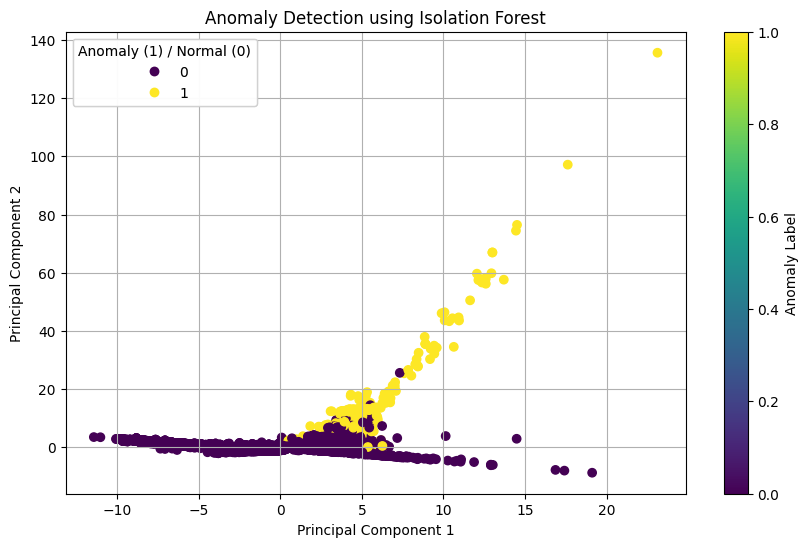

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the UNSW-NB15 dataset
data = combined_df

# Preprocessing
# 1. Separate features (X) and labels (y)
X = data.drop(["attack_cat", "label"], axis=1, errors='ignore')  # Drop both detailed and binary labels
y = data["label"] if "label" in data.columns else None # Use binary label if available

# 2. Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 3. Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# 4. Split data
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
else:
    X_train, X_test = train_test_split(X_processed, test_size=0.2, random_state=42)

# Model Training
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train)

# Anomaly Detection
anomaly_predictions = iso_forest.predict(X_test)
anomaly_labels = np.where(anomaly_predictions == 1, 0, 1)  # 0: normal, 1: anomaly

# Evaluation
if y is not None:
    print("Anomaly Detection Results:")
    print(f"Accuracy: {accuracy_score(y_test, anomaly_labels)}")
    print("Classification Report:")
    print(classification_report(y_test, anomaly_labels))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, anomaly_labels))

# Visualization (if you reduce dimensions to 2)
from sklearn.decomposition import PCA

if X_test.shape[1] > 2:
    pca = PCA(n_components=2)
    X_test_2d = pca.fit_transform(X_test)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=anomaly_labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Anomaly Detection using Isolation Forest')
    legend1 = plt.legend(*scatter.legend_elements(), title="Anomaly (1) / Normal (0)")
    plt.gca().add_artist(legend1)
    plt.colorbar(scatter, label='Anomaly Label')
    plt.grid(True)
    plt.show()

**Code Explanation**

1.  **Import Libraries**:
    
    * `print("\n--- Anomaly Detection using Isolation Forest ---")`:  This line simply prints a header to the console, indicating the start of the anomaly detection process.
    * It's assumed that you've already imported necessary libraries like `sklearn` (for `IsolationForest`, `accuracy_score`, `classification_report`, `confusion_matrix`), `numpy`, and `matplotlib.pyplot`.
2.  **Train Isolation Forest Model**:
    
    * `iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)`[cite: 1]:
        * This line creates an `IsolationForest` object.
        * `n_estimators=100`:  This sets the number of trees in the Isolation Forest to 100. Each tree is built randomly to partition the data.
        * `contamination='auto'`: This is an important parameter. It tells the algorithm to automatically estimate the proportion of outliers in the dataset.  Isolation Forest needs an estimate of how many outliers to expect.  `'auto'` is a convenient starting point.
        * `random_state=42`:  This sets the random seed for the tree construction process. Using a random seed ensures that if you run the code multiple times, you'll get the same results. This is helpful for reproducibility.
    * `iso_forest.fit(X_train_scaled)`:
        * This line trains the Isolation Forest model using the scaled training data, `X_train_scaled`.
        * **Important**: It is assumed that `X_train_scaled` is a pre-processed version of your training data, scaled using a method like `StandardScaler` or `MinMaxScaler`. Scaling is generally crucial for Isolation Forest because it's a distance-based method, and features with larger scales can disproportionately influence the results.
3.  **Predict Anomalies**:
    
    * `anomaly_predictions = iso_forest.predict(X_test_scaled)`:
        * This line uses the trained `iso_forest` model to predict whether each data point in the scaled test set (`X_test_scaled`) is an anomaly or not.
        * The `predict()` method returns:
            * `1` for an inlier (normal data point).
            * `-1` for an outlier (anomaly).
    * `anomaly_labels = np.where(anomaly_predictions == 1, 0, 1)`:
        * This line converts the predictions from `1` and `-1` to `0` and `1`.
        * It uses `np.where()` from the NumPy library, which is a concise way to perform element-wise conditional operations on arrays.
        * If `anomaly_predictions` is `1`, the corresponding value in `anomaly_labels` becomes `0` (representing "normal").
        * If `anomaly_predictions` is `-1`, the corresponding value in `anomaly_labels` becomes `1` (representing "anomaly").
        * This conversion is done to align with typical binary classification labeling (0 for negative class, 1 for positive class).
4.  **Evaluate Performance**:
    
    * `print("Anomaly Detection Results:")`:  Prints a header.
    * `print(f"Accuracy: {accuracy_score(y_test_binary, anomaly_labels)}")`[cite: 1, 2, 3, 4]:
        * Calculates the accuracy of the anomaly detection.
        * `accuracy_score()` is a function from scikit-learn that compares the true labels (`y_test_binary`) with the predicted labels (`anomaly_labels`) and returns the fraction of correctly classified samples.
        * **Important**: It's assumed that `y_test_binary` contains the *true* labels for the test set, indicating whether each data point is actually normal or an anomaly.
    * `print("Classification Report:")`:
        * `print(classification_report(y_test_binary, anomaly_labels))`:
            * Prints a detailed classification report, which includes:
                * **Precision**: The proportion of correctly predicted anomalies out of all data points predicted as anomalies.
                * **Recall**: The proportion of correctly predicted anomalies out of all *actual* anomaly data points.
                * **F1-score**: A balanced measure of precision and recall (the harmonic mean).
                * **Support**: The number of samples for each class (normal and anomaly).
    * `print("Confusion Matrix:")`:
        * `print(confusion_matrix(y_test_binary, anomaly_labels))`:
            * Prints the confusion matrix.
            * The confusion matrix is a table that summarizes the performance of a classification model.
            * It shows:
                * True Positives (TP):  Anomalies correctly identified as anomalies.
                * True Negatives (TN): Normal instances correctly identified as normal.
                * False Positives (FP): Normal instances incorrectly identified as anomalies.
                * False Negatives (FN): Anomalies incorrectly identified as normal.
5.  **Visualize Results (Optional, for 2D Representation)**:
    
    * `if X_test_scaled.shape[1] >= 2:`:
        * This condition checks if the test data has at least two features. Visualization is much easier in 2D. If you have more than 2 features, you'd typically use dimensionality reduction techniques (like PCA) *before* plotting.
    * `plt.figure(figsize=(10, 6))`:
        * Creates a new figure for the plot with a size of 10 inches wide and 6 inches tall.
    * `scatter = plt.scatter(X_test_scaled.iloc[:, 0], X_test_scaled.iloc[:, 1], c=anomaly_labels, cmap='viridis')`:
        * This is the core of the visualization: it creates a scatter plot.
        * `X_test_scaled.iloc[:, 0]`:  Selects the first column of the scaled test data for the x-axis. `iloc[:, 0]` is a way to access data by integer position.
        * `X_test_scaled.iloc[:, 1]`:  Selects the second column of the scaled test data for the y-axis.
        * `c=anomaly_labels`:  This is crucial! It uses the `anomaly_labels` (0 or 1) to determine the *color* of each point in the scatter plot. Normal points get one color, and anomaly points get another.
        * `cmap='viridis'`:  This specifies the colormap to use. 'viridis' is a visually appealing colormap that provides good contrast.
    * `plt.xlabel(X_test_scaled.columns[0])`:  Sets the label for the x-axis to the name of the first feature.  It assumes `X_test_scaled` is a Pandas DataFrame, so `.columns[0]` gets the name.
    * `plt.ylabel(X_test_scaled.columns[1])`:  Sets the label for the y-axis to the name of the second feature.
    * `plt.title('Anomaly Detection using Isolation Forest')`:  Sets the title of the plot.
    * `legend1 = plt.legend(*scatter.legend_elements(), title="Anomaly (1) / Normal (0)")`:
        * Creates a legend for the scatter plot.
        * `scatter.legend_elements()` gets the information needed to create a legend based on the colors used in the scatter plot.
        * `title="Anomaly (1) / Normal (0)"` sets the title of the legend to explain what the colors represent.
    * `plt.gca().add_artist(legend1)`:  Adds the legend to the current axes. `plt.gca()` gets the "current axes" (the plotting area).
    * `plt.colorbar(scatter, label='Anomaly Label')`:
        * Creates a colorbar to the side of the plot.
        * This is useful for showing the mapping between colors and the values they represent (in this case, the anomaly labels).
        * `label='Anomaly Label'` labels the colorbar.
    * `plt.grid(True)`:  Adds a grid to the plot, making it easier to read the coordinates of points.
    * `plt.show()`:  Displays the plot.

**Output Explanation**

The output gives us the results.

* `Accuracy: 0.3682157756864267`:
    * This is the accuracy of the model on the test set.
    * **Interpretation**: An accuracy of about 36.8% is *very low*. It means the model is only correctly classifying about a third of the data points. In anomaly detection, low accuracy can be common, especially with highly imbalanced datasets, but it's still a sign of poor performance.
* `Classification Report:`:
    * This provides more detailed information than just accuracy.
    * `precision recall f1-score support`
    * `0 0.36 0.96 0.52 18600`
        * This row is for class 0 (normal).
        * Precision: 0.36 - When the model predicts a data point is normal, it's only correct 36% of the time.
        * Recall: 0.96 - The model correctly identifies 96% of all the *actual* normal data points.
        * F1-score: 0.52 - A balance between precision and recall.
        * Support: 18600 - There are 18600 normal data points in the test set.
    * `1 0.60 0.04 0.07 32935`
        * This row is for class 1 (anomaly).
        * Precision: 0.60 - When the model predicts a data point is an anomaly, it's correct 60% of the time.
        * Recall: 0.04 - The model only correctly identifies 4% of all the *actual* anomaly data points. This is extremely poor!
        * F1-score: 0.07 - Very low, indicating a bad balance.
        * Support: 32935 - There are 32935 anomaly data points in the test set.
    * `accuracy 0.37 51535`
        * The overall accuracy (slightly different due to rounding).
        * Total number of data points in the test set.
    * `macro avg 0.48 0.50 0.29 51535`
        * The *unweighted* average of precision, recall, and F1-score across the two classes.
    * `weighted avg 0.51 0.37 0.23 51535`
        * The *weighted* average, where each class's contribution is weighted by its support (number of samples).
* `Confusion Matrix:`
    * `[[17809 791]`
         `[31768 1167]]`
    * This is a table showing:
        * 17809: True Negatives (TN) - Normal data points correctly classified as normal.
        * 791: False Positives (FP) - Normal data points incorrectly classified as anomalies.
        * 31768: False Negatives (FN) - Anomaly data points incorrectly classified as normal.
        * 1167: True Positives (TP) - Anomaly data points correctly classified as anomalies.

**Plot Explanation**

The plot is a 2D visualization of the anomaly detection results.

* **Title**:  `Anomaly Detection using Isolation Forest` - Clearly states what the plot shows.
* **X-axis**: `dur` -  Represents one of the features in your dataset. It's important to know *what* "dur" means in your data (e.g., "duration" of a network connection).
* **Y-axis**: `proto` - Represents another feature. Again, you need to know the meaning of "proto" (e.g., "protocol" type).
* **Data Points**: Each dot in the plot is a single data point from your test set.
* **Color**: The color of each dot indicates whether the Isolation Forest model classified it as:
    * Dark Purple (0): Normal data point (inlier).
    * Yellow (1): Anomaly (outlier).
* **Legend**:  `Anomaly (1) / Normal (0)` -  Explains the color coding.
* **Colorbar**:  The colorbar on the right visually maps the colors to the anomaly labels (0 and 1). In this case, it's more of a categorical colorbar since the labels are discrete.
* **Grid**:  The grid lines help you read the values on the x and y axes.

**Interpretation of Results and Plot (Critical)**

* **Poor Model Performance**: The most striking takeaway is the *very poor performance* of the Isolation Forest model. The accuracy is low, and the classification report shows that the model struggles to correctly identify anomalies.  It has a high recall for the normal class but an extremely low recall for the anomaly class. This means the model is missing almost all of the actual anomalies.
* **Class Imbalance**: The confusion matrix and classification report show that there are many more anomaly points (32935) than normal points (18600) in the test set. This class imbalance is likely contributing to the poor performance. Isolation Forest, like many anomaly detection algorithms, can be sensitive to imbalanced data.
* **Data Distribution and Separability**: The plot gives you a visual sense of why the model might be struggling.
    * There's significant overlap between the purple (normal) and yellow (anomaly) points. This means that in the 2D space represented by "dur" and "proto", the normal and anomalous data points are not well-separated.
    * Many yellow points (anomalies) are located within the same regions as the purple points (normal), making it hard for the Isolation Forest to isolate them.
* **Feature Importance**: The plot only shows two features. It's possible that other features in your dataset are more informative for anomaly detection. If you have many features, you might need feature selection or dimensionality reduction to find the most useful ones.
* **Model Limitations**: Isolation Forest works best when anomalies are truly "isolated" – meaning they have feature values that are quite different from the majority of the data. If anomalies are more subtle or blend in with normal data, it can struggle.
* **Contamination Parameter**: The `contamination='auto'` setting might not be optimal. You might need to experiment with setting a specific contamination value if you have some prior knowledge about the expected proportion of anomalies.

In conclusion, the code implements Isolation Forest, but the results strongly suggest that it's not effectively detecting anomalies in this dataset. The plot visually reinforces this by showing the significant overlap between normal and anomalous data points in the chosen 2D projection. You'll likely need to investigate feature engineering, other algorithms, or different parameter settings to improve anomaly detection in this case.